In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import tensorflow as tf
import keras
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [ ]:
code = {"Benign":0 ,"Early":1,"Pre":2,"Pro":3}

def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

In [ ]:
s=224

In [ ]:
import cv2
from tqdm import tqdm
import os

In [ ]:
X_train = []
y_train = []
for img in tqdm(os.listdir('/content/drive/MyDrive/Lukemiadetection/Benign')):
    image = cv2.imread(os.path.join('/content/drive/MyDrive/Lukemiadetection/Benign',img),1)
    image_array = cv2.resize(image , (s,s))
    X_train.append(list(image_array))
    y_train.append(code['Benign'])

100%|██████████| 352/352 [00:03<00:00, 109.83it/s]


In [ ]:
for img in tqdm(os.listdir('/content/drive/MyDrive/Lukemiadetection/Early')):
    image = cv2.imread(os.path.join('/content/drive/MyDrive/Lukemiadetection/Early',img),1)
    image_array = cv2.resize(image , (s,s))
    X_train.append(list(image_array))
    y_train.append(code['Early'])

100%|██████████| 1983/1983 [00:51<00:00, 38.75it/s] 


In [ ]:
for img in tqdm(os.listdir('/content/drive/MyDrive/Lukemiadetection/Pre')):
    image = cv2.imread(os.path.join('/content/drive/MyDrive/Lukemiadetection/Pre',img),1)
    image_array = cv2.resize(image , (s,s))
    X_train.append(list(image_array))
    y_train.append(code['Pre'])

100%|██████████| 1881/1881 [00:48<00:00, 38.80it/s] 


In [ ]:
for img in tqdm(os.listdir('/content/drive/MyDrive/Lukemiadetection/Pro')):
    image = cv2.imread(os.path.join('/content/drive/MyDrive/Lukemiadetection/Pro',img),1)
    image_array = cv2.resize(image , (s,s))
    X_train.append(list(image_array))
    y_train.append(code['Pro'])

100%|██████████| 1687/1687 [00:42<00:00, 40.02it/s] 


In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
len(X_train)

3920

In [ ]:
X_test = []
y_test = []
for img in tqdm(os.listdir('/content/drive/MyDrive/Segmented/Benign')):
    image = cv2.imread(os.path.join('/content/drive/MyDrive/Segmented/Benign',img),1)
    image_array = cv2.resize(image , (s,s))
    X_test.append(list(image_array))
    y_test.append(code['Benign'])

100%|██████████| 504/504 [00:08<00:00, 58.39it/s] 


In [ ]:
for img in tqdm(os.listdir('/content/drive/MyDrive/Segmented/Early')):
    image = cv2.imread(os.path.join('/content/drive/MyDrive/Segmented/Early',img),1)
    image_array = cv2.resize(image , (s,s))
    X_test.append(list(image_array))
    y_test.append(code['Early'])

  1%|          | 7/985 [00:02<05:25,  3.00it/s]

In [ ]:
for img in tqdm(os.listdir('/content/drive/MyDrive/Segmented/Pre')):
    image = cv2.imread(os.path.join('/content/drive/MyDrive/Segmented/Pre',img),1)
    image_array = cv2.resize(image ,(s,s))
    X_test.append(list(image_array))
    y_test.append(code['Pre'])

100%|██████████| 963/963 [00:34<00:00, 28.29it/s] 


In [ ]:
for img in tqdm(os.listdir('/content/drive/MyDrive/Segmented/Pro')):
    image = cv2.imread(os.path.join('/content/drive/MyDrive/Segmented/Pro',img),1)
    image_array = cv2.resize(image ,(s,s))
    X_test.append(list(image_array))
    y_test.append(code['Pro'])

100%|██████████| 804/804 [00:16<00:00, 50.24it/s] 


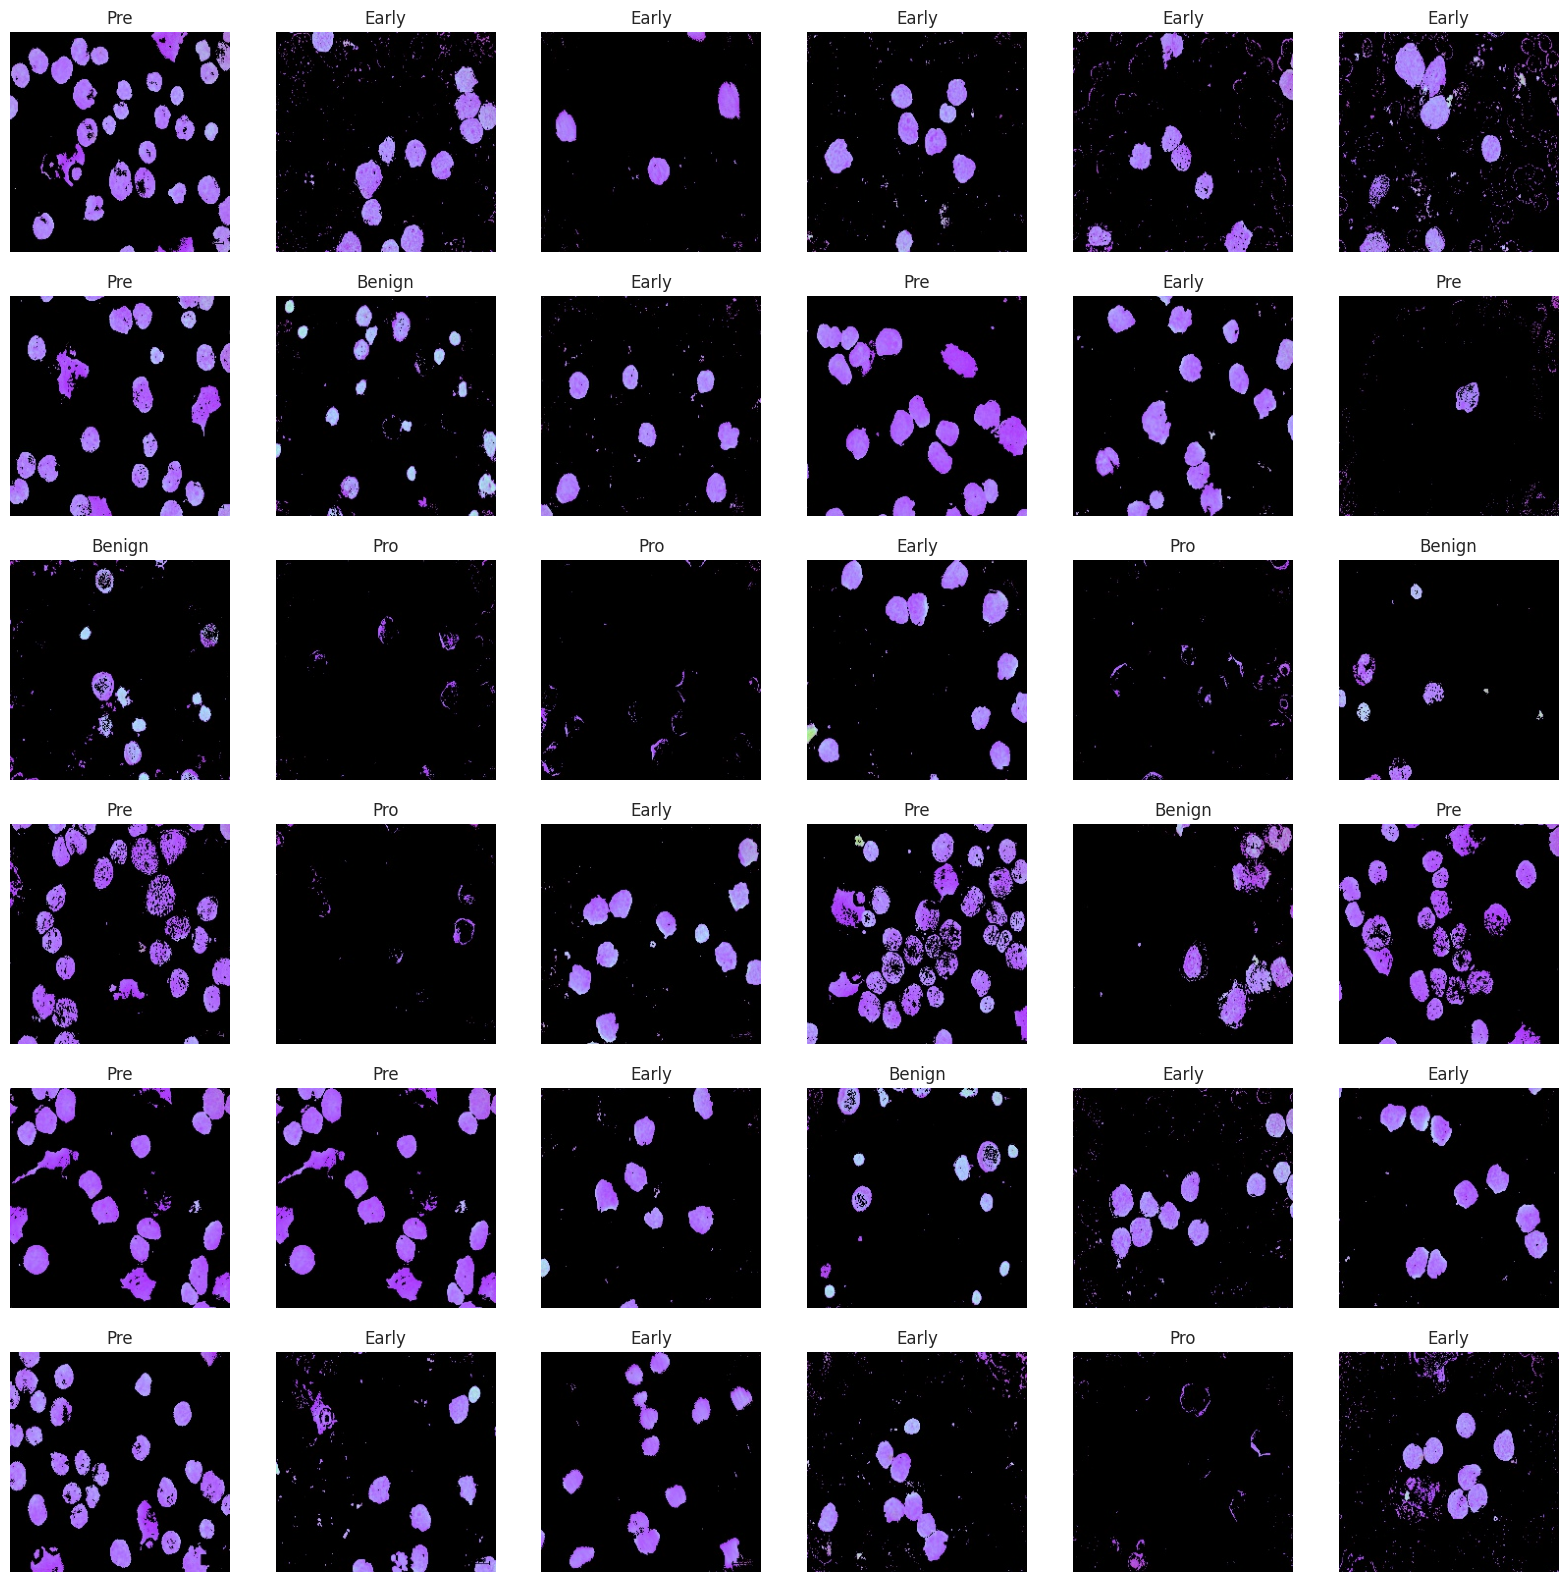

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [ ]:
da=[]
for i,j in zip(X_train,y_train):
    da.append([i,j])

In [ ]:
import random
random.shuffle(da)

In [ ]:
len(da)

3920

In [ ]:
X=[]
y=[]
for img,label in da:
    X.append(img)
    y.append(label)

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,shuffle=True)
print(xtest.shape)
print(xtrain.shape)

(784, 224, 224, 3)
(3136, 224, 224, 3)


In [ ]:
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(200, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)),
    keras.layers.Conv2D(150, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Conv2D(120, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(100, kernel_size=(3,3), activation='relu'),  # New layer
    keras.layers.Conv2D(50, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(4, activation='softmax'),
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
m_model=tf.keras.applications.vgg19.VGG19()
model1=tf.keras.models.Sequential()
for layer in m_model.layers[:-1]:
    model1.add(layer)
for layer in model1.layers:
    layer.trainable=False
model1.add(tf.keras.layers.Dense(4,activation=tf.nn.softmax))

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model1.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print('Model Details are : ')
print(model1.summary())

Model Details are : 


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 139,586,628 (532.48 MB)

 Trainable params: 16,388 (64.02 KB)

 Non-trainable params: 139,570,240 (532.42 MB)

None


In [ ]:
history=model1.fit(xtrain,ytrain,batch_size=128,
                  verbose=1,
                  validation_data=(xtest,ytest),epochs=30)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.6175 - loss: 1.0061 - val_accuracy: 0.9133 - val_loss: 0.2308
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 68s 762ms/step - accuracy: 0.9368 - loss: 0.1915 - val_accuracy: 0.9592 - val_loss: 0.1371
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 789ms/step - accuracy: 0.9698 - loss: 0.1177 - val_accuracy: 0.9630 - val_loss: 0.1253
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 829ms/step - accuracy: 0.9741 - loss: 0.0999 - val_accuracy: 0.9694 - val_loss: 0.0999
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 858ms/step - accuracy: 0.9809 - loss: 0.0711 - val_accuracy: 0.9809 - val_loss: 0.0822
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 843ms/step - accuracy: 0.9862 - loss: 0.0617 - val_accuracy: 0.9847 - val_loss: 0.0743
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 861ms/step - accuracy: 0.9864 - loss: 0.0533 - val_accuracy: 0.9821 - val_loss: 0.0721
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 916ms/step - accuracy: 0.9914 - loss: 0.0464 - val_accurac

In [ ]:
y_pred = model1.predict(xtest)

print('Prediction Shape is {}'.format(y_pred.shape))

25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step
Prediction Shape is (784, 4)


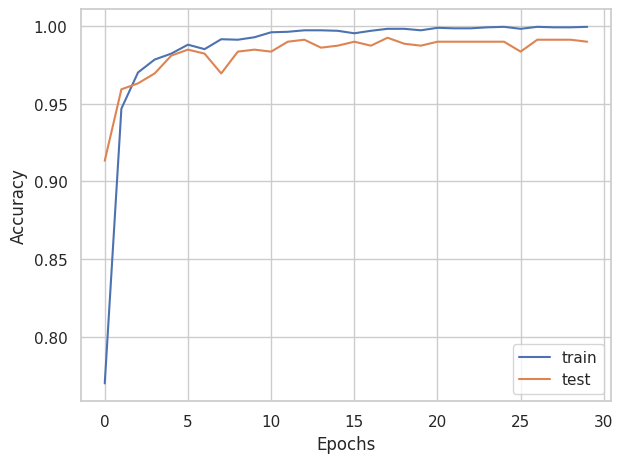

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc='lower right')
plt.tight_layout()

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(xtest),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(xtest[i])
    plt.axis('off')
    plt.title(getcode(np.argmax(y_pred[i])))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow.keras.models import save_model


In [ ]:
# After training your model (model1)
save_model(model1, '/content/drive/MyDrive/lukemia_cancertype_classifier.h5')  # Replace with your desired filename
print("Model saved successfully!")


Model saved successfully!


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model1.predict(xtest)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
accuracy = accuracy_score(ytest, y_pred_classes)
print('Test Accuracy:', accuracy)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step
Test Accuracy: 0.9897959183673469


In [ ]:
import cv2

def preprocess_image(img_path):
  img = cv2.imread(img_path)
  img_resized = cv2.resize(img, (224, 224))  # Adjust size if needed
  # Further preprocessing steps (e.g., normalization) can be added here
  return img_resized


In [ ]:
import glob
import os

def get_image_paths(folder_path):
  """
  This function returns a list of image file paths in a folder.
  """
  return glob.glob(os.path.join(folder_path, "*.jpg"))  # Adjust for your image format

# Example usage
new_image_paths = get_image_paths("/content/drive/MyDrive/validimages")


In [ ]:
from sklearn.metrics import accuracy_score

new_image_paths = get_image_paths("/content/drive/MyDrive/validimages")
predicted_labels = []
ground_truth_labels = []  # If you have ground truth labels

for img_path in new_image_paths:
  preprocessed_img = preprocess_image(img_path)
  prediction = model1.predict(np.expand_dims(preprocessed_img, axis=0))[0]
  predicted_label = np.argmax(prediction)
  predicted_labels.append(predicted_label)

  # Add ground truth label if available
  if ground_truth_labels:
    ground_truth_labels.append(get_ground_truth_label(img_path))  # Replace with your logic

if ground_truth_labels:
  accuracy = accuracy_score(ground_truth_labels, predicted_labels)
  print("Accuracy on new folder:", accuracy)
else:
  print("Predicted labels:", predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted labels: [0, 2, 2, 3]


In [ ]:


from keras.models import Sequential, load_model
import os.path
import tensorflow as tf

model_path = "/content/drive/MyDrive/lukemia_cancertype_classifier.h5"

print(os.path.exists(model_path))

if os.path.isfile(model_path):
    print ("File exist")
else:
    print ("File not exist")

# Define a custom object scope to handle 'softmax_v2'
with tf.keras.utils.custom_object_scope({'softmax_v2': tf.keras.activations.softmax}):
    model = load_model(model_path) # The model is loaded into the 'model' variable

new_image = preprocess_image('/content/drive/MyDrive/validimages/WBC-Malignant-Pre-952.jpg')  # Replace with your preprocessing function

# Make predictions using the 'model' variable instead of 'new_model'
prediction = model.predict(np.expand_dims(new_image, axis=0))[0] # Changed 'new_model' to 'model'
predicted_label = np.argmax(prediction)
print("Predicted label:", predicted_label)

True
File exist


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
Predicted label: 2
